### Simulation

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
low = -20e-6
high = 20e-6
n_iso = 1000

z_pos = np.linspace(low, high, n_iso)
z_pos = np.append(z_pos, 0.)
z_pos = np.sort(z_pos)  

In [30]:
seq_path_on = [f'seq_lib/ETM_variation/{i}_ETM.seq' for i in range(0, 251, 10)]
seq_path_off = [f'seq_lib/ETM_variation/{i}_ETM_minus.seq' for i in range(0, 251, 10)]
config_path = 'sim_lib/config_1pool.yaml'

In [31]:
adc_time = 6e-3
webhook = False

In [32]:
from bmc.utils.tex_variation import run_variation

In [33]:
# N_ETM, signal = run_variation(seq_path_on,
#                              seq_path_off,
#                              config_path,
#                              adc_time,
#                              z_pos,
#                              webhook,
#                              num_points = len(seq_path_on),
#                              batch_size=26,
#                              max_processes=26)

In [34]:
# fig, ax = plt.subplots(dpi=100)

# plt.yscale('log')
# plt.plot(N_ETM, signal, 'o--', c='blue', linewidth=1, markersize=5, label='150 Hz')
# # plt.plot(n_ETMc * 1000, signal_250Hz, 'o--', c='red', linewidth=1, markersize=5, label='250 Hz')
# # plt.plot(n_ETMc * 1000, signal_350Hz, 'o--', c='green', linewidth=1, markersize=5, label='250 Hz')
# # plt.plot(n_ETMc * 1000, signal_50Hz, 'o--', c='fuchsia', linewidth=1, markersize=5, label='50 Hz')
# # plt.plot(n_ETMc * 1000, signal_20Hz, 'o--', c='gold', linewidth=1, markersize=5, label='20 Hz')
# # plt.plot(n_ETMc * 1000, signal_350Hz, 'o--', c='green', linewidth=1, markersize=5, label='250 Hz')
# # plt.axhline(torch.max(signal).item(), color='blue', linewidth=.8)
# # plt.axvline(30, color='blue', linewidth=.8)
# # plt.text(30, plt.ylim()[0] - 0.0001, f"{30} ms",
# #          color='blue', ha='center', va='top', fontsize=8)
# ax.set_ylabel('signal intensity')
# ax.set_xlabel(r'$t_{ex}$ [ms]')
# ax.legend()
# # plt.xlim(0, 65)
# plt.ylim(10e-5, 10e-2)


# # plt.savefig("signal_plot_kex.png", dpi=300, bbox_inches='tight')


In [35]:
seq_two_on = ['seq_lib/6_ETM.seq']
seq_two_off = ['seq_lib/6_ETM_minus.seq']

two_ETM, signal_two_ETM = run_variation(seq_two_on,
                             seq_two_off,
                             config_path,
                             adc_time,
                             z_pos,
                             webhook,
                             num_points = 1,
                             batch_size=1,
                             max_processes=1)

# N_ETM, signal = run_variation(seq_path_on,
#                              seq_path_off,
#                              config_path,
#                              adc_time,
#                              z_pos,
#                              webhook,
#                              num_points = len(seq_path_on),
#                              batch_size=26,
#                              max_processes=26)

Geladene Ergebnisse: 28
Bereits verarbeitete Indizes: 28


BMCTool simulation: 100%|██████████| 39/39 [01:40<00:00,  2.59s/it]


['rf at 0.0000s', 'gz at 0.0020s', 'adc at 0.0025s']


BMCTool simulation: 100%|██████████| 39/39 [01:44<00:00,  2.67s/it]


['rf at 0.0000s', 'gz at 0.0020s', 'adc at 0.0025s']
Ergebnis gespeichert: (6, np.float64(0.000560682971447477)) | 29 Einträge


In [42]:
import numpy as np

try:
    results = np.load("results/results.npy", allow_pickle=True).tolist()
    print(f"Loaded results: {len(results)}")
except FileNotFoundError:
    print("File 'results.npy' not found.")
    results = []

if results:
    n_ETM, signal = zip(*results)
    n_ETM = np.array(n_ETM)
    signal = np.array(signal)
    sorted_indices = np.argsort(n_ETM)
    n_ETM = n_ETM[sorted_indices]
    signal = signal[sorted_indices]
    print(n_ETM)
else:
    print("No results found.")

Loaded results: 29
[  0.   2.   3.   6.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.
 110. 120. 130. 140. 150. 160. 170. 180. 190. 200. 210. 220. 230. 240.
 250.]


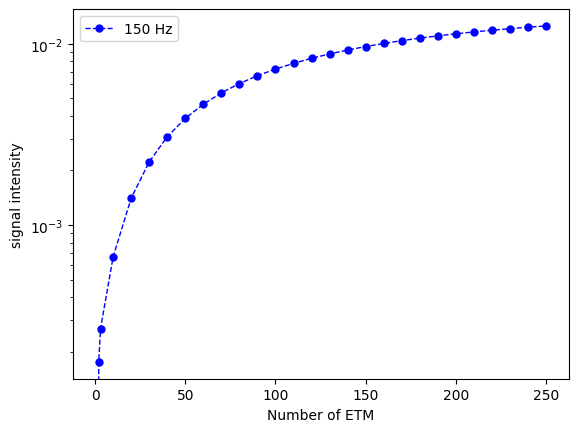

In [ ]:
fig, ax = plt.subplots(dpi=100)

plt.yscale('log')
mask = n_ETM != 6
plt.plot(n_ETM[mask], signal[mask], 'o--', c='blue', linewidth=1, markersize=5, label='150 Hz')
ax.set_ylabel('signal intensity')
ax.set_xlabel('Number of ETM')
ax.legend()

plt.savefig("results/signal_plot_etm.png", dpi=300, bbox_inches='tight')